<a href="https://colab.research.google.com/github/Kostia2004/DLScompetition/blob/main/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!unzip /content/drive/MyDrive/ЭэЭэЭэЭксперименты/Нейронки/ML\ Kaggle/advanced-dls-spring-2021.zip

Archive:  /content/drive/MyDrive/ЭэЭэЭэЭксперименты/Нейронки/ML Kaggle/advanced-dls-spring-2021.zip
  inflating: submission.csv          
  inflating: test.csv                
  inflating: train.csv               


In [6]:
dataset = pd.read_csv('train.csv')
dataset

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,0
5278,50,44.45,2188.45,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0
5279,1,55.05,55.05,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,0
5280,29,76.00,2215.25,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0


In [7]:
for column in dataset.columns:
  print(column, np.unique(np.asarray(dataset.loc[:,column])))

ClientPeriod [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72]
MonthlySpending [ 18.25  18.4   18.7  ... 118.6  118.65 118.75]
TotalSpent [' ' '100.2' '100.25' ... '997.65' '998.1' '999.9']
Sex ['Female' 'Male']
IsSeniorCitizen [0 1]
HasPartner ['No' 'Yes']
HasChild ['No' 'Yes']
HasPhoneService ['No' 'Yes']
HasMultiplePhoneNumbers ['No' 'No phone service' 'Yes']
HasInternetService ['DSL' 'Fiber optic' 'No']
HasOnlineSecurityService ['No' 'No internet service' 'Yes']
HasOnlineBackup ['No' 'No internet service' 'Yes']
HasDeviceProtection ['No' 'No internet service' 'Yes']
HasTechSupportAccess ['No' 'No internet service' 'Yes']
HasOnlineTV ['No' 'No internet service' 'Yes']
HasMovieSubscription ['No' 'No internet service' 'Yes']
HasContractPhone ['Month-to-month' 'One year' 'Two year']
IsBillingPaperless ['No' 'Yes']


In [8]:
def normalyze(dataset):
  dataset = dataset.drop(dataset[dataset['TotalSpent'].isin([' '])].index, axis=0)
  dataset = dataset.replace('No internet service', 'No')
  dataset = dataset.replace('No phone service', 'No')
  dataset['Sex'] = pd.factorize(dataset['Sex'])[0]
  dataset['HasPartner'] = pd.factorize(dataset['HasPartner'])[0]
  dataset['HasChild'] = pd.factorize(dataset['HasChild'])[0]
  dataset['HasPhoneService'] = pd.factorize(dataset['HasPhoneService'])[0]
  dataset['HasMultiplePhoneNumbers'] = pd.factorize(dataset['HasMultiplePhoneNumbers'])[0]
  dataset['HasInternetService'] = pd.factorize(dataset['HasInternetService'])[0]
  dataset['HasOnlineSecurityService'] = pd.factorize(dataset['HasOnlineSecurityService'])[0]
  dataset['HasOnlineBackup'] = pd.factorize(dataset['HasOnlineBackup'])[0]
  dataset['HasDeviceProtection'] = pd.factorize(dataset['HasDeviceProtection'])[0]
  dataset['HasTechSupportAccess'] = pd.factorize(dataset['HasTechSupportAccess'])[0]
  dataset['HasOnlineTV'] = pd.factorize(dataset['HasOnlineTV'])[0]
  dataset['HasMovieSubscription'] = pd.factorize(dataset['HasMovieSubscription'])[0]
  dataset['HasContractPhone'] = pd.factorize(dataset['HasContractPhone'])[0]
  dataset['IsBillingPaperless'] = pd.factorize(dataset['IsBillingPaperless'])[0]
  dataset['PaymentMethod'] = pd.factorize(dataset['PaymentMethod'])[0]
  return dataset

In [9]:
dataset = normalyze(dataset)
dataset

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,72,25.85,1872.2,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0
2,1,75.90,75.9,0,0,1,1,0,0,1,0,0,0,1,0,0,2,1,2,1
3,32,79.30,2570,1,1,0,1,0,1,1,0,0,1,0,0,0,2,0,0,0
4,60,115.25,6758.45,1,0,0,0,0,1,1,1,1,1,1,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,0,0,1,1,1,0,2,0,0,0,1,0,0,2,0,2,0
5278,50,44.45,2188.45,0,0,0,1,1,0,2,1,0,0,1,1,0,0,1,3,0
5279,1,55.05,55.05,0,0,1,1,0,0,2,0,0,1,1,0,0,2,0,0,0
5280,29,76.00,2215.25,1,0,1,1,0,1,1,0,0,0,0,0,0,2,1,1,0


In [10]:
X_columns = dataset.columns[:-1]
Y_columns = ['Churn']

In [11]:
x = dataset[X_columns]
y = dataset[Y_columns]

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x.values, y.values, test_size=0.3, random_state=17)

#Tree

##Train tree classifer

In [23]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [14]:
tree.get_depth()

23

###Tree parameters setup

In [15]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [16]:
tree_params = {'max_depth': range(1,20),
'max_features': range(2,19)}

In [17]:
tree_grid = GridSearchCV(tree, tree_params,
cv=5, n_jobs=-1,
verbose=True)

In [18]:
tree_grid.fit(x_train, y_train)

Fitting 5 folds for each of 323 candidates, totalling 1615 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 20),
                         'max_features': range(2, 19)},
             verbose=True)

In [19]:
tree_grid.best_params_, tree_grid.best_score_

({'max_depth': 5, 'max_features': 11}, 0.7930104037170278)

##Test tree classifer

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

tree_pred = tree.predict(x_test)
print('accuracy:', accuracy_score(y_test, tree_pred)) 
print('roc_auc:', roc_auc_score(y_test, tree_pred))
print('precision:', precision_score(y_test, tree_pred))
print('recall:', recall_score(y_test, tree_pred)) 

accuracy: 0.7484197218710493
roc_auc: 0.6729400508967261
precision: 0.4892086330935252
recall: 0.5244215938303342


In [21]:
print('accuracy:', accuracy_score(y_test, tree_grid.predict(x_test))) #(TP+TN)/(TP+TN+FP+FN)
print('roc_auc:', roc_auc_score(y_test, tree_grid.predict(x_test)))
print('precision:', precision_score(y_test, tree_grid.predict(x_test))) #TP/(TP+FP)
print('recall:', recall_score(y_test, tree_grid.predict(x_test))) #TP/(TP+FN)

accuracy: 0.7876106194690266
roc_auc: 0.6408871803601558
precision: 0.6199095022624435
recall: 0.35218508997429304


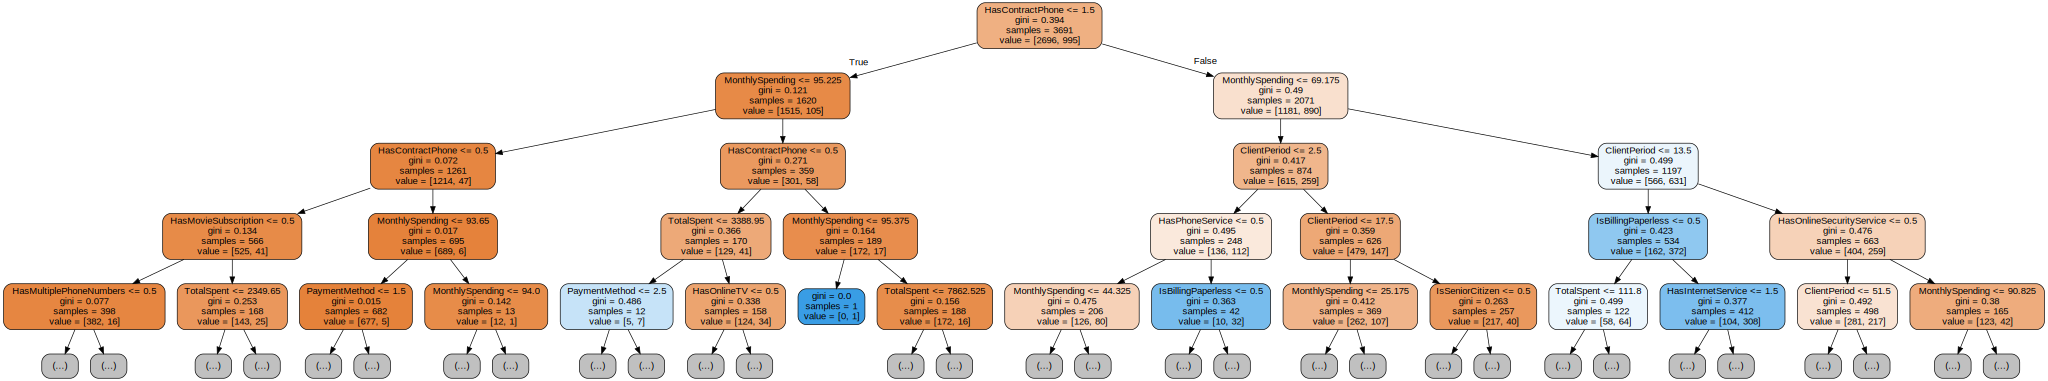

In [41]:
from sklearn.tree import export_graphviz
import graphviz

graph = export_graphviz(tree,
                        feature_names=X_columns,
                        max_depth = 4,
                        filled=True,
                        rounded=True)
graphviz.Source(graph)

#Logistic Regression

##Train logistic regression classifer

In [24]:
from sklearn.linear_model import LogisticRegression

LRclf = LogisticRegression()
LRclf.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

##Test logistic regression classifer

In [25]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

tree_pred = LRclf.predict(x_test)
print('accuracy:', accuracy_score(y_test, tree_pred)) 
print('roc_auc:', roc_auc_score(y_test, tree_pred))
print('precision:', precision_score(y_test, tree_pred))
print('recall:', recall_score(y_test, tree_pred)) 

accuracy: 0.8109987357774968
roc_auc: 0.7230944433790082
precision: 0.6331360946745562
recall: 0.5501285347043702
